# Code for HW2 APM598
- Author: Jieshu Wang (jwang490@asu.edu)
- Feb 2020
- Two-layer linear neural networks and CNN (Convolutional Neural Networks)
- need to import HW2_util.py

## Ex 1. a) Two-layer NN with four data points

In [4]:
# 1. Two-layers Neural Networks
# ex1. a) find parameters that satisfies the four data points. 
from torch.utils.data import TensorDataset
import torch
from HW2_util import ModuleParams as MyParams, TwoLayerReluClassificationModel as LinearModel, MyNNTrainer as MyTrainer

training_data_x_ex1a = [[1,0],
                        [-1,0],
                        [0,1],
                        [0,-1]]
training_data_y_ex1a = [0,0,1,1]
training_data_ex1a = TensorDataset(torch.as_tensor(training_data_x_ex1a, dtype=float),
                              torch.as_tensor(training_data_y_ex1a, dtype=torch.long))

ex1a_params = MyParams(learning_rate=0.01, batch_size=4, optimizer='Adam', 
                       num_epoch=300, good_parameter_threshold=0.9)

ex1a_model = MyTrainer(LinearModel, ex1a_params, training_data_ex1a)
ex1a_df = ex1a_model.result

-- epoch 0 --
    loss: 0.7173
    accuracy: 0.7500
-- epoch 60 --
    loss: 0.5350
    accuracy: 0.7500
-- epoch 120 --
    loss: 0.3073
    accuracy: 1.0000
-- epoch 180 --
    loss: 0.1151
    accuracy: 1.0000
-- epoch 240 --
    loss: 0.0530
    accuracy: 1.0000
300 trainings is finished! Spent time 0.7616450786590576 seconds.
Final training loss: 0.0306
Final training accuracy: 1.0000


## Ex 1. a) continue:
- Plot the loss and accuracy
- Print the good parameters that perform at least 90% accurate

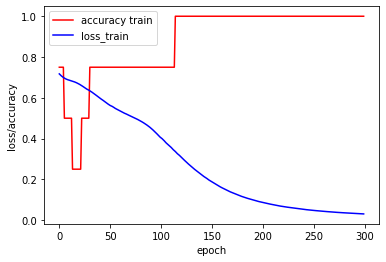


 The parameters that perform with (at least) 90.0% accuracy are:

-- epoch 114.0: (accuracy, loss): (1.0000, 0.3366)
    _model.0.weight
    Parameter containing:
tensor([[-6.3965e-04,  3.1640e+00],
        [ 1.2890e-04,  1.6093e+00]], requires_grad=True)
    _model.0.bias
    Parameter containing:
tensor([3.8592e-05, 1.6075e+00], requires_grad=True)
    _model.2.weight
    Parameter containing:
tensor([[-2.2489,  2.1716],
        [ 2.3645, -1.8699]], requires_grad=True)
    _model.2.bias
    Parameter containing:
tensor([-1.7466,  0.9981], requires_grad=True)

-- epoch 115.0: (accuracy, loss): (1.0000, 0.3315)
    _model.0.weight
    Parameter containing:
tensor([[-6.3965e-04,  3.1640e+00],
        [ 1.2890e-04,  1.6093e+00]], requires_grad=True)
    _model.0.bias
    Parameter containing:
tensor([3.8592e-05, 1.6075e+00], requires_grad=True)
    _model.2.weight
    Parameter containing:
tensor([[-2.2489,  2.1716],
        [ 2.3645, -1.8699]], requires_grad=True)
    _model.2.bias
   

In [5]:
# ex1. a) continue
# plot the loss and accuracy 
from HW2_util import plot_loss_accuracy, print_good_parameters

plot_loss_accuracy(ex1a_df, include_test=False)
print_good_parameters(ex1a_df, ex1a_params)

## Ex 1. b) Two-layer NN with many data points

In [8]:
# ex1. b) provide accuracy of the two-layer nn for the dataset

import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset

training_df_ex1b = pd.read_csv('./data/data_HW2_ex1.csv')
X = np.column_stack((training_df_ex1b['x1'].values, training_df_ex1b['x2'].values))
y = training_df_ex1b['class'].values - 1

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
training_set = TensorDataset(torch.as_tensor(x_train, dtype=float), torch.as_tensor(y_train, dtype=torch.long))
test_set = TensorDataset(torch.as_tensor(x_test, dtype=float), torch.as_tensor(y_test, dtype=torch.long))

ex1b_params = MyParams(learning_rate=0.01, batch_size=10, optimizer='Adam', num_epoch=50, good_parameter_threshold=0.9)
ex1b_trainer = MyTrainer(LinearModel, ex1b_params, training_set, test_set)
ex1b_df = ex1b_trainer.result

-- epoch 0 --
    loss (train, test): 0.7417, 0.6758
    accuracy (train, test): 0.4938, 0.5250
-- epoch 10 --
    loss (train, test): 0.4831, 0.4543
    accuracy (train, test): 0.6875, 0.7500
-- epoch 20 --
    loss (train, test): 0.3196, 0.2849
    accuracy (train, test): 0.9062, 0.9250
-- epoch 30 --
    loss (train, test): 0.2661, 0.2251
    accuracy (train, test): 0.9187, 0.9250
-- epoch 40 --
    loss (train, test): 0.2390, 0.1919
    accuracy (train, test): 0.9125, 0.9250
50 trainings is finished! Spent time 0.7130460739135742 seconds.
Final loss (train, test): 0.2271, 0.1994
Final accuracy (train, test): 0.9000, 0.9250


## Ex 1. b) continue:
- Plot the loss and accuracy
- Print the good parameters that perform at least 90% accurate

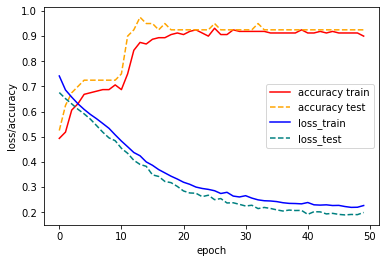


 The parameters that perform with (at least) 90.0% accuracy are:

-- epoch 18.0: (accuracy, loss): (0.9062, 0.3435)
    _model.0.weight
    Parameter containing:
tensor([[-0.1749,  1.5354],
        [-0.2841,  2.4099]], requires_grad=True)
    _model.0.bias
    Parameter containing:
tensor([ 1.6386, -0.1143], requires_grad=True)
    _model.2.weight
    Parameter containing:
tensor([[ 1.8576, -3.0312],
        [-1.9714,  2.2479]], requires_grad=True)
    _model.2.bias
    Parameter containing:
tensor([-1.3847,  0.9436], requires_grad=True)

-- epoch 19.0: (accuracy, loss): (0.9125, 0.3323)
    _model.0.weight
    Parameter containing:
tensor([[-0.1749,  1.5354],
        [-0.2841,  2.4099]], requires_grad=True)
    _model.0.bias
    Parameter containing:
tensor([ 1.6386, -0.1143], requires_grad=True)
    _model.2.weight
    Parameter containing:
tensor([[ 1.8576, -3.0312],
        [-1.9714,  2.2479]], requires_grad=True)
    _model.2.bias
    Parameter containing:
tensor([-1.3847,  0.943

In [9]:
# ex1. b) continue, plot and print the results

plot_loss_accuracy(ex1b_df, include_test=True)
print_good_parameters(ex1b_df, ex1b_params)

## Ex 2. N.N. Approximate functions
### Ex 2. c) write a program that returns a two layer n.n.

In [10]:
# ex2c
from dataclasses import dataclass

# generate random data points
number_data = 30  # number of points
y_start, y_stop = 0.0, 5.0
x_data_2c = np.sort(np.random.rand(number_data))
x_data_2c_tensor = torch.as_tensor(x_data_2c, dtype=float)
y_data_2c = (y_stop-y_start)*np.random.rand(number_data) + y_start
y_data_2c_tensor = torch.as_tensor(y_data_2c)
y_data_2c_tensor = y_data_2c_tensor.float().view(number_data,1)
training_data_ex2c = TensorDataset(x_data_2c_tensor, y_data_2c_tensor)

def find_params(x, y):
    w1 = [1.0 for i in x]
    b1 = [-i for i in x]
    b2 = y[0]
    w1_mat, b1_mat = np.mat(w1), np.mat(b1).T
    b1_mat_repeat = np.repeat(b1_mat, len(x), axis=1)
    x_mat, y_mat = np.mat(x), np.mat(y)
    z_mat = w1_mat.T@x_mat
    z_mat += b1_mat_repeat
    z_mat_relu = np.mat(np.where(z_mat<0, 0, z_mat)).T
    y_b = (y_mat-b2).T
    w2_mat = np.linalg.pinv(z_mat_relu)@y_b
    w2 = np.asarray(w2_mat)
    return w1, b1, w2, b2

w1, b1, w2, b2 = find_params(x_data_2c, y_data_2c)


### Ex2. c) test how well the parameters I just found approximate the data points. 

In [11]:
print('The errors of each data points are:')
for i in range(number_data):
    z = [max(0, x_data_2c[i]+b1[j]) for j in range(number_data)]
    score = sum([z[j]*w2[j] for j in range(number_data)]) + b2
    error = float(score - y_data_2c[i])
    print(f'{error:.4f}')

The errors of each data points are:
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000


## Ex 3. CNN with Fashion-MNIST dataset
- the best accuracy on test set is ___0.8916___

In [13]:
# ex3. CNN
from torchvision import datasets
import torchvision.transforms as transforms
from HW2_util import CNNNet as MyCNN

MNIST_training_set = datasets.FashionMNIST('./data/HW2/data_sets', train=True, download=True, transform=transforms.ToTensor())
MNIST_test_set = datasets.FashionMNIST('./data/HW2/data_sets', train=False, download=True, transform=transforms.ToTensor())

my_parameters = MyParams(drop_out_rate=0.2, num_epoch=10, learning_rate=0.001)
cnn_trainer = MyTrainer(MyCNN, my_parameters, MNIST_training_set, MNIST_test_set)
cnn_df = cnn_trainer.result

-- epoch 0 --
    loss (train, test): 0.5893, 0.4481
    accuracy (train, test): 0.7826, 0.8392
-- epoch 2 --
    loss (train, test): 0.3955, 0.3905
    accuracy (train, test): 0.8563, 0.8592
-- epoch 4 --
    loss (train, test): 0.3584, 0.3524
    accuracy (train, test): 0.8688, 0.8753
-- epoch 6 --
    loss (train, test): 0.3412, 0.3496
    accuracy (train, test): 0.8770, 0.8748
-- epoch 8 --
    loss (train, test): 0.3292, 0.3396
    accuracy (train, test): 0.8790, 0.8790
10 trainings is finished! Spent time 167.6247329711914 seconds.
Final loss (train, test): 0.3257, 0.3272
Final accuracy (train, test): 0.8810, 0.8861


## Ex 3. continue:
- Plot the loss and accuracy

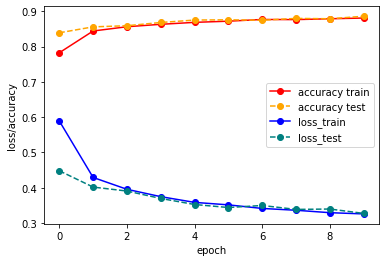

In [14]:
# ex3. continue, plot the results
plot_loss_accuracy(cnn_df, marker='o', include_test=True)
# print(cnn_trainer.model)